## Initial data analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# pull data from github
bank_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter03/data/bank-additional/bank-additional-full.csv", sep=";")

# visualize the head of the dataset
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [0]:
# define numerical features
numerical_features = [col for col in bank_data.columns \
                      if np.issubdtype(bank_data[col].dtype, np.number)]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [0]:
# print statistics about the different numerical columns
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


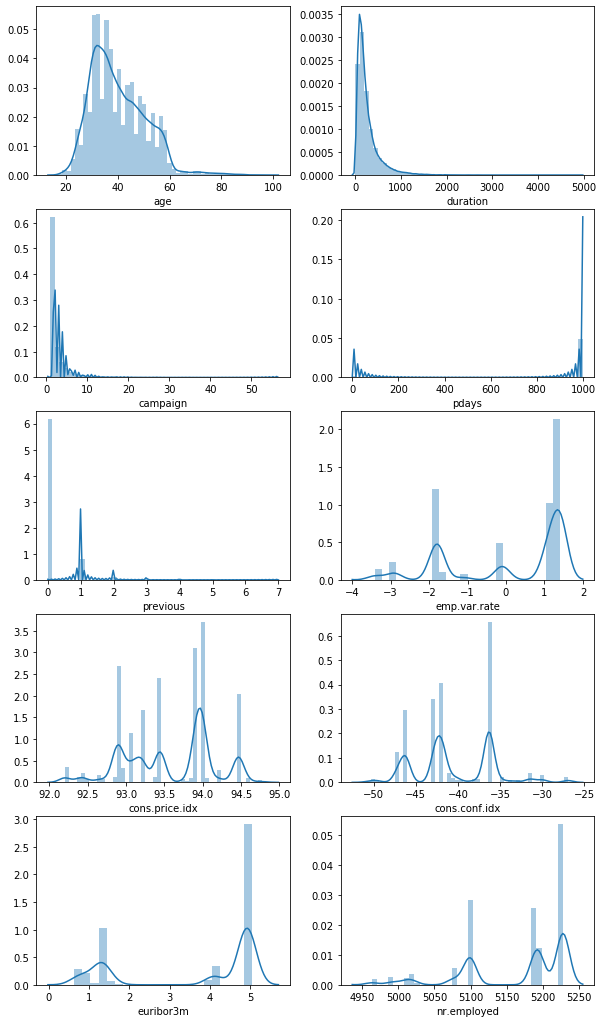

In [0]:
# plot distributions of numerical features
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(bank_data[col])
plt.savefig("figs/exercise_3_01_distributions.png", format="png", dpi=500)

## Exercise 3.02: Analyzing distributions of categorical features in banking dataset

In [0]:
# define categorical features
categorical_features = [col for col in bank_data.columns \
                      if pd.api.types.is_string_dtype(bank_data[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


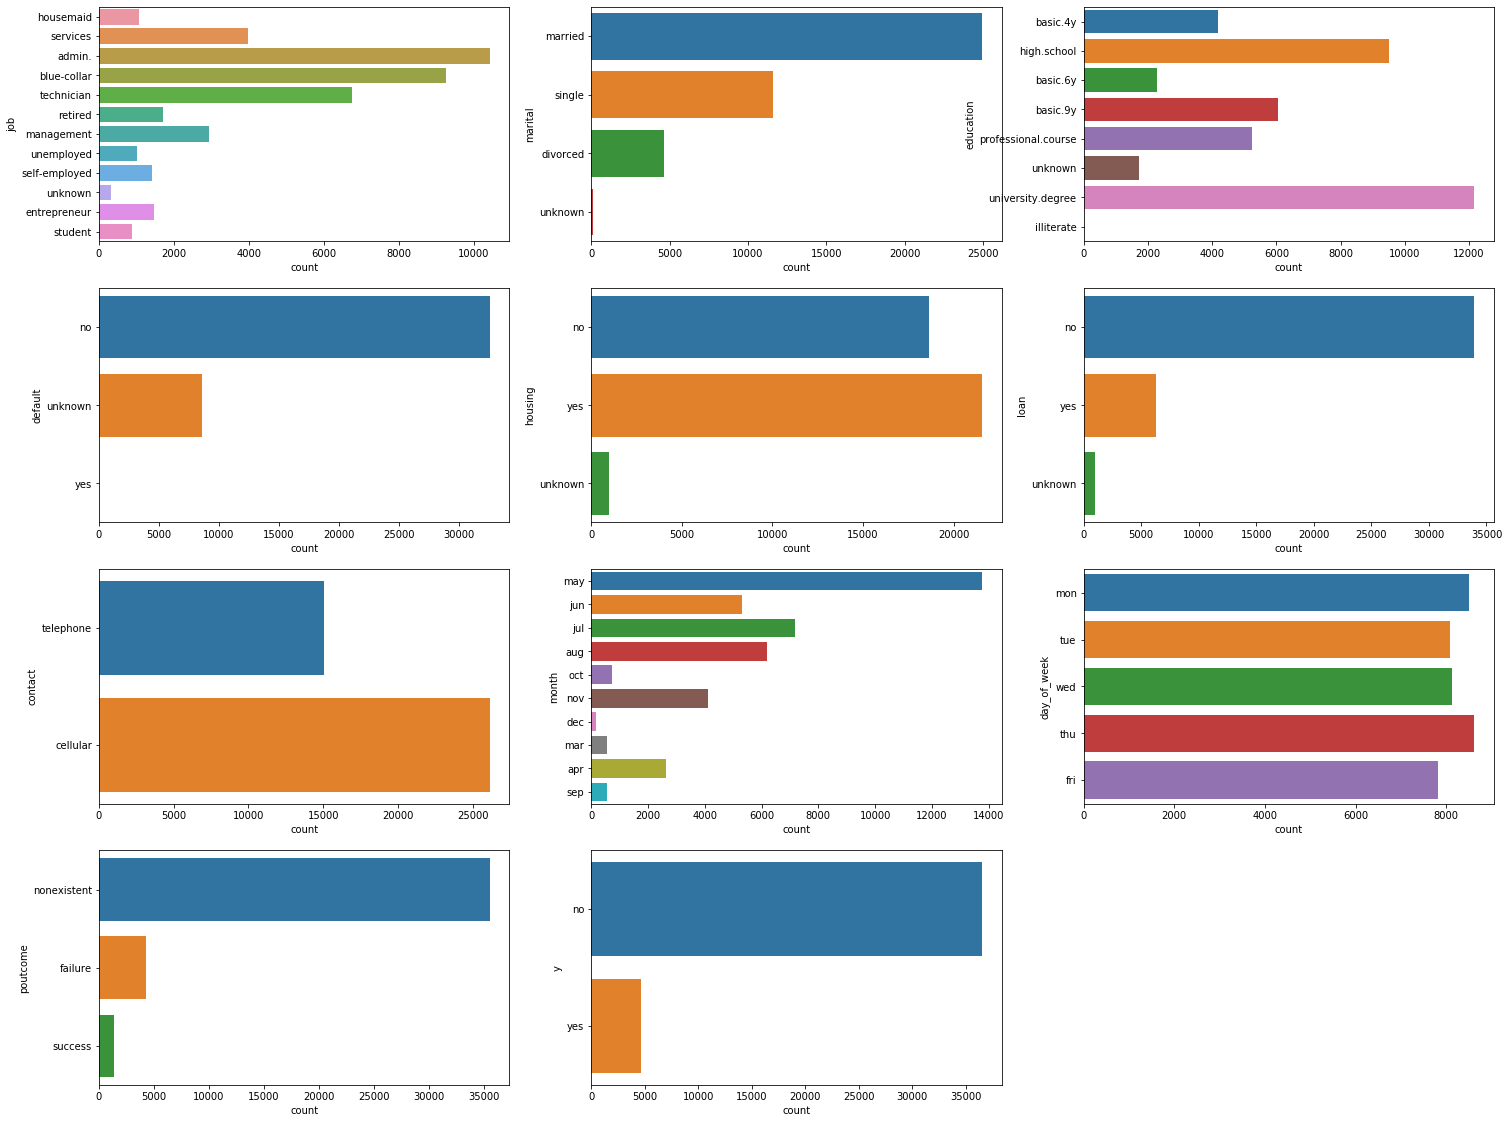

In [0]:
# plot distributions of numerical features
plt.figure(figsize=(25,35))
for index, col in enumerate(categorical_features):
    plt.subplot(6, 2, index+1)
    ax = sns.countplot(y=col, data=bank_data)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

plt.savefig("figs/exercise_3_02_counts.png", format="png", dpi=500)

In [0]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, ascending=True)*100)

Total number of entries:
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64
